In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


EDA(Exploratory Data Analysis)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.shape

(1338, 7)

In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [62]:
df['smoker'].isna().sum()


np.int64(0)

Visualization 



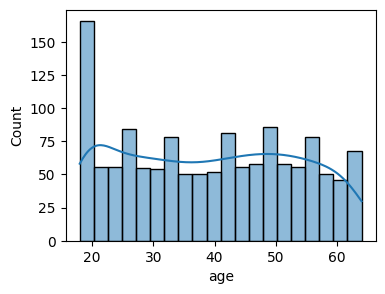

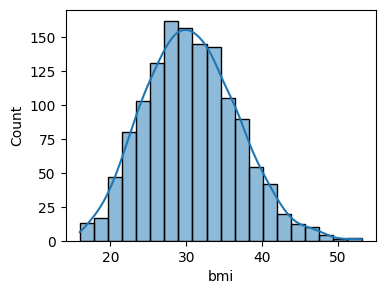

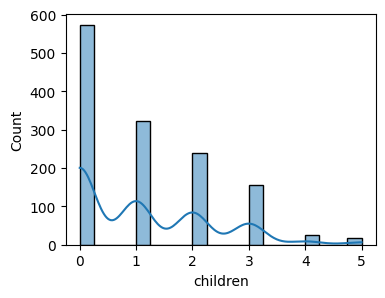

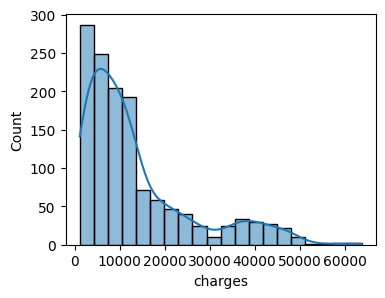

In [19]:
#Collecting the numeric value
numeric_col = ['age','bmi','children','charges']
for col in numeric_col:
    plt.figure(figsize=(4,3))
    sns.histplot(df[col],kde=True,bins =20)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: xlabel='children', ylabel='count'>

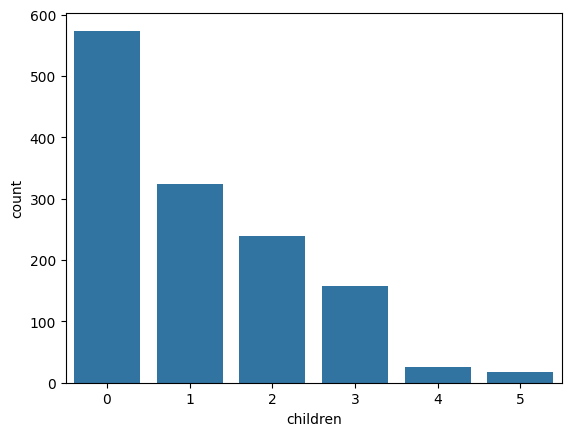

In [25]:
#Collecting the numeric object for analysis

sns.countplot(x=df['children'])    

<Axes: xlabel='smoker', ylabel='count'>

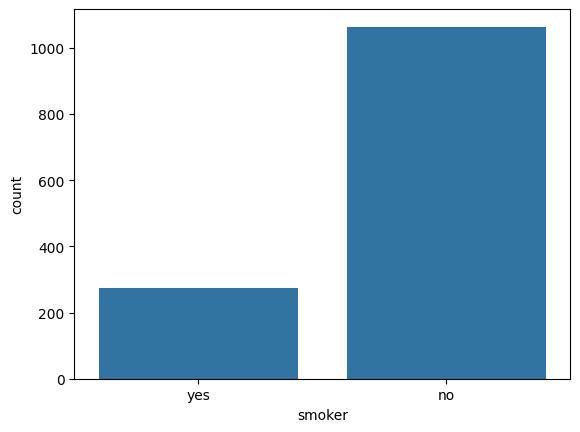

In [26]:
sns.countplot(x=df['smoker'])

<Axes: xlabel='sex', ylabel='count'>

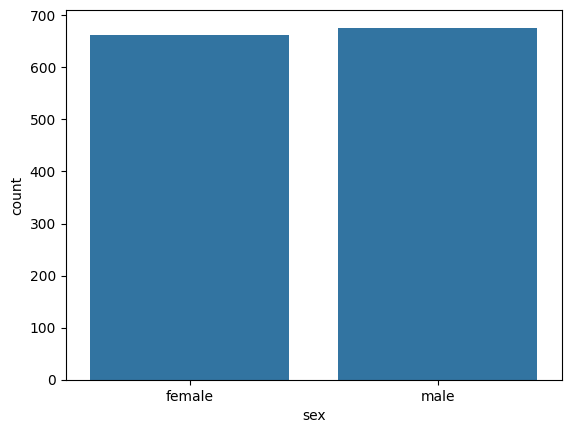

In [27]:
sns.countplot(x=df['sex'])

#Analysis Outlier 


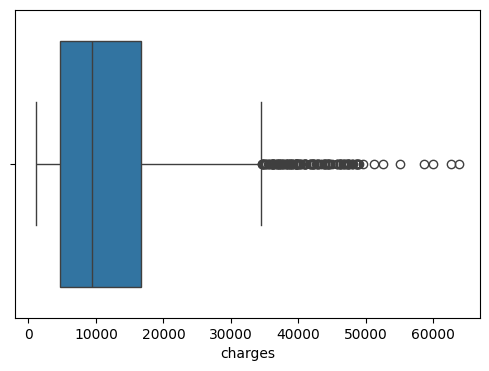

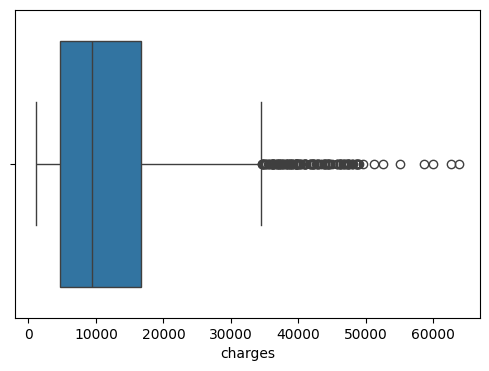

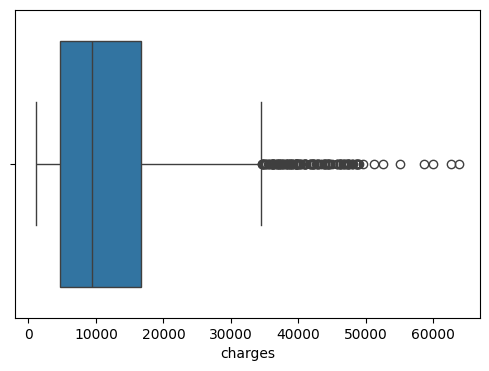

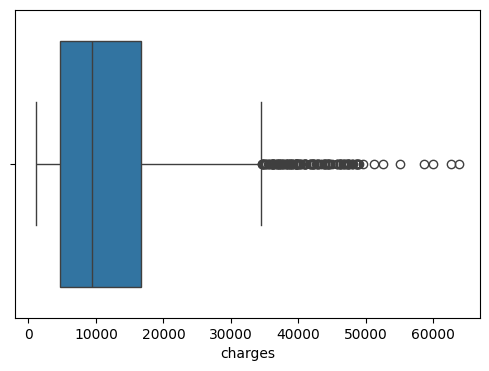

In [28]:
#Creating the BoxPlot for analysis 
for i in numeric_col:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])


<Axes: >

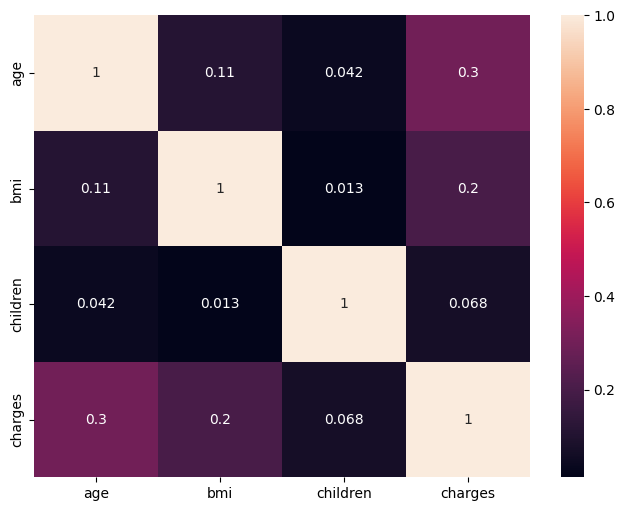

In [33]:
#Co-relation
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)

#Data Cleaning anf Preprocessing

In [34]:
df_cleaned = df.copy()

In [35]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [36]:
df_cleaned.drop_duplicates(inplace=True)

In [37]:
df_cleaned.shape

(1337, 7)

In [38]:
df_cleaned.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [39]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [40]:
#Encoding the Object value (Label Encoding)
df_cleaned['sex'] = df_cleaned['sex'].map({"male":0,"female":1})
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [41]:
df_cleaned['smoker'] = df_cleaned['smoker'].map({"no":0,"female":1})
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,NaN,southwest,16884.92400
1,18,0,33.770,1,0.0,southeast,1725.55230
2,28,0,33.000,3,0.0,southeast,4449.46200
3,33,0,22.705,0,0.0,northwest,21984.47061
4,32,0,28.880,0,0.0,northwest,3866.85520


In [43]:
df_cleaned.rename(columns={
    'sex':'is_female',
     'smoker':'is_smoker'
},inplace=True)

In [44]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,NaN,southwest,16884.92400
1,18,0,33.770,1,0.0,southeast,1725.55230
2,28,0,33.000,3,0.0,southeast,4449.46200
3,33,0,22.705,0,0.0,northwest,21984.47061
4,32,0,28.880,0,0.0,northwest,3866.85520


In [48]:
df['bmi'].value_counts()

bmi
32.300    13
28.310     9
30.800     8
31.350     8
30.495     8
          ..
20.350     1
31.240     1
19.095     1
22.100     1
21.280     1
Name: count, Length: 548, dtype: int64

In [49]:
df_cleaned =pd.get_dummies(df_cleaned,columns=['region'])
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,NaN,16884.92400,False,False,False,True
1,18,0,33.770,1,0.0,1725.55230,False,False,True,False
2,28,0,33.000,3,0.0,4449.46200,False,False,True,False
3,33,0,22.705,0,0.0,21984.47061,False,True,False,False
4,32,0,28.880,0,0.0,3866.85520,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0.0,10600.54830,False,True,False,False
1334,18,1,31.920,0,0.0,2205.98080,True,False,False,False
1335,18,1,36.850,0,0.0,1629.83350,False,False,True,False
1336,21,1,25.800,0,0.0,2007.94500,False,False,False,True


In [51]:
df_cleaned = df_cleaned.dropna()
df_cleaned = df_cleaned.astype(int)
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
1,18,0,33,1,0,1725,0,0,1,0
2,28,0,33,3,0,4449,0,0,1,0
3,33,0,22,0,0,21984,0,1,0,0
4,32,0,28,0,0,3866,0,1,0,0
5,31,1,25,0,0,3756,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1332,52,1,44,3,0,11411,0,0,0,1
1333,50,0,30,3,0,10600,0,1,0,0
1334,18,1,31,0,0,2205,1,0,0,0
1335,18,1,36,0,0,1629,0,0,1,0


Feature Engineering and Extraction


In [53]:
df_cleaned['bmi_category'] = pd.cut(
    df_cleaned['bmi'],
    bins=[0,18.5,24.9,29.9,float('inf')],
    labels=['Underweight','Normal','Overweight','Obese']
)

In [54]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category
1,18,0,33,1,0,1725,0,0,1,0,Obese
2,28,0,33,3,0,4449,0,0,1,0,Obese
3,33,0,22,0,0,21984,0,1,0,0,Normal
4,32,0,28,0,0,3866,0,1,0,0,Overweight
5,31,1,25,0,0,3756,0,0,1,0,Overweight
...,...,...,...,...,...,...,...,...,...,...,...
1332,52,1,44,3,0,11411,0,0,0,1,Obese
1333,50,0,30,3,0,10600,0,1,0,0,Obese
1334,18,1,31,0,0,2205,1,0,0,0,Obese
1335,18,1,36,0,0,1629,0,0,1,0,Obese


In [55]:
df_cleaned =pd.get_dummies(df_cleaned,columns=['bmi_category'])

In [56]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_Underweight,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
1,18,0,33,1,0,1725,0,0,1,0,False,False,False,True
2,28,0,33,3,0,4449,0,0,1,0,False,False,False,True
3,33,0,22,0,0,21984,0,1,0,0,False,True,False,False
4,32,0,28,0,0,3866,0,1,0,0,False,False,True,False
5,31,1,25,0,0,3756,0,0,1,0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,52,1,44,3,0,11411,0,0,0,1,False,False,False,True
1333,50,0,30,3,0,10600,0,1,0,0,False,False,False,True
1334,18,1,31,0,0,2205,1,0,0,0,False,False,False,True
1335,18,1,36,0,0,1629,0,0,1,0,False,False,False,True


In [57]:
df_cleaned = df_cleaned.dropna()
df_cleaned = df_cleaned.astype(int)
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_Underweight,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
1,18,0,33,1,0,1725,0,0,1,0,0,0,0,1
2,28,0,33,3,0,4449,0,0,1,0,0,0,0,1
3,33,0,22,0,0,21984,0,1,0,0,0,1,0,0
4,32,0,28,0,0,3866,0,1,0,0,0,0,1,0
5,31,1,25,0,0,3756,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,52,1,44,3,0,11411,0,0,0,1,0,0,0,1
1333,50,0,30,3,0,10600,0,1,0,0,0,0,0,1
1334,18,1,31,0,0,2205,1,0,0,0,0,0,0,1
1335,18,1,36,0,0,1629,0,0,1,0,0,0,0,1


Feature Scalling

In [59]:
#Standard Scalling
from sklearn.preprocessing import StandardScaler
cols=['age','bmi','children']
scaler = StandardScaler()
df_cleaned[cols] = scaler.fit_transform(df_cleaned[cols])
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_Underweight,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
1,-1.521340,0,0.467410,-0.074939,0,1725,0,0,1,0,0,0,0,1
2,-0.810584,0,0.467410,1.567533,0,4449,0,0,1,0,0,0,0,1
3,-0.455205,0,-1.345937,-0.896175,0,21984,0,1,0,0,0,1,0,0
4,-0.526281,0,-0.356839,-0.896175,0,3866,0,1,0,0,0,0,1,0
5,-0.597357,1,-0.851388,-0.896175,0,3756,0,0,1,0,0,0,1,0


In [60]:
from scipy.stats import pearsonr
#List of feature to check against target
selected_features = ['age',	'is_female','bmi','children','is_smoker','region_northeast','region_northwest','region_southeast','region_southwest','bmi_category_Underweight','bmi_category_Normal','bmi_category_Overweight','bmi_category_Obese']
correlations ={
    feature:pearsonr(df_cleaned[feature],df_cleaned['charges'])[0]
    for feature in selected_features
}
correlation_df = pd.DataFrame(list(correlations.items()),columns=['Feature','Pearson Correlation'])
correlation_df.sort_values(by='Pearson Correlation',ascending=False)





,Feature,Pearson Correlation
0,age,0.627401
3,children,0.138110
2,bmi,0.083651
12,bmi_category_Obese,0.073216
5,region_northeast,0.068333
1,is_female,0.055281
6,region_northwest,0.013676
11,bmi_category_Overweight,-0.019659
7,region_southeast,-0.040085
8,region_southwest,-0.040740


In [70]:
cat_features = [
    'is_female','is_smoker','region_northwest','bmi_category_Obese','region_northeast','bmi_category_Overweight','bmi_category_Underweight','bmi_category_Normal'
]

In [71]:
from scipy.stats import chi2_contingency
import pandas as pd

# Significance level
alpha = 0.05

# Convert continuous target to bins (quartiles)
df_cleaned['charges_bin'] = pd.qcut(df_cleaned['charges'], q=4, labels=False)

# Dictionary to save results
chi2_results = {}

# cat_features = list of your categorical column names
# Example: cat_features = ['sex', 'smoker', 'region']
# Make sure you define this before running
# cat_features = [...]

for col in cat_features:
    # Create contingency table
    contingency = pd.crosstab(df_cleaned[col], df_cleaned['charges_bin'])

    # Run Chi-Square test
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)

    # Decision based on p-value
    decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'

    # Save results
    chi2_results[col] = {
        'chi2_statistic': chi2_stat,
        'p_value': p_val,
        'Decision': decision
    }
chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value')
chi2_df


,chi2_statistic,p_value,Decision
bmi_category_Obese,10.506203,0.014719,Reject Null (Keep Feature)
bmi_category_Underweight,6.142043,0.1049,Accept Null (Drop Feature)
region_northeast,5.664095,0.129147,Accept Null (Drop Feature)
is_female,5.119233,0.163272,Accept Null (Drop Feature)
bmi_category_Normal,5.002197,0.171636,Accept Null (Drop Feature)
bmi_category_Overweight,4.248379,0.235863,Accept Null (Drop Feature)
region_northwest,1.639393,0.650491,Accept Null (Drop Feature)
is_smoker,0.0,1.0,Accept Null (Drop Feature)


In [74]:
df_final = df_cleaned[['age','bmi','bmi_category_Obese','children','charges','is_female']]

In [75]:
df_final

,age,bmi,bmi_category_Obese,children,charges,is_female
1,-1.521340,0.467410,1,-0.074939,1725,0
2,-0.810584,0.467410,1,1.567533,4449,0
3,-0.455205,-1.345937,0,-0.896175,21984,0
4,-0.526281,-0.356839,0,-0.896175,3866,0
5,-0.597357,-0.851388,0,-0.896175,3756,1
...,...,...,...,...,...,...
1332,0.895233,2.280758,1,1.567533,11411,1
1333,0.753081,-0.027139,1,1.567533,10600,0
1334,-1.521340,0.137711,1,-0.896175,2205,1
1335,-1.521340,0.961960,1,-0.896175,1629,1
